# BEE 4310/6310: Environmental Statistics and Learning  <br> Assignment #6 (10 pts)

**Include responses to everything below in bold (including plots), and make sure your final assignment is well organized in a single markdown PDF submitted to Canvas. This makes it easier to grade (and easier to give partial credit).**

**Remember to include an acknowledgement at the bottom of this assignment if generative AI was used for coding support, including a list of the problems for which it was used.**

<img src="LearningOutcomes_6.png" width="1000"/>

**Techniques and Topics:** 
- Principal component analysis
- Visualizing PCs and EOFs
- Selecting number of principal components
- Interpreting PCA
- K-Means clustering
- Hierarchical clustering
- Selecting number of clusters

**Packages and functions covered in Data Camp exercises (note: many will not be needed in the problems below)** 

| numpy as np       | Matplotlib.pyplot as plt  | pandas as pd  | scipy.stats | seaborn as sns | statsmodels.formula.api | statsmodels.api as sm |
| -----------       | ------------------------  | ------------  | ----------- | -------------- | ----------------------- | --------------------- |  
|np.array           | plt.plot                  | pd.DataFrame  | uniform.cdf | sns.scatterplot| ols                     | sm.qqplot             |
|np.mean            | plt.show                  | pd.read_csv   | uniform.rvs | sns.lmplot     | ols.fit                 | sm.families.Gaussian  |
|np.median          | plt.xscale                | pd.get_dummies| uniform.ppf | sns.regplot    | ols.params              | sm.families.Binomial  |
|np.var             | plt.yscale                | pd.concat     | binom.cdf   | sns.displot    | ols.predict             | sm.families.Poisson   |
|np.std             | plt.scatter               | pd.crosstab   | binom.rvs   | sns.residplot  | ols.fittedvalues        |
|np.quantile        | plt.hist                  | df.iloc       | binom.ppf   |                | ols.resid
|np.random.rand     | plt.clf                   | df.loc        | norm.cdf    |                | ols.rsquared
|np.random.randint  | plt.xlabel                | df.apply      | norm.rvs    |                | ols.mse_resid
|np.random.seed     | plt.tlabel                | df.iterrows   | norm.ppf    |                | ols.summary
|np.logical_or      | plt.title                 | df.sample     | poisson.cdf |                | ols.get_influence().resid_studentized_internal
|np.logical_and     | plt.xticks                | df.assign     | poisson.rvs |                | ols.get_influence().summary_frame()
|np.nditer          | plt.yticks                | df.drop       | poisson.pmf |                | logit
|np.transpose       | plt.text                  | df.dropna     |             |                | logt.pred_table
|np.arange          | plt.grid                  | df.isnull     |             |                | glm
|np.append          | plt.figure                | df.describe   |             |                | glm.fit
|np.where           | plt.axis                  | series.corr   |             |                | glm.params
|                   | plt.axhline               |               |             |                | glm.predict
|                   | plt.axvline               |               |             |                | glm.fittedvalues
|                   | plt.bar                   |               |             |                | glm.cov_params
|                   |                           |               |             |                | glm.conf_int


| sklearn.linear_model           | sklearn.model_selection| sklearn.preprocessing        | sklearn.neighbors             | sklearn.metrics        |
| ------------------------------ | -----------------------| ---------------------        | ----------------------------- | ---------------------- |
| LinearRegression               | train_test_split       | StandardScaler               | KNeighborsClassifier          | mean_squared_error     | 
| LinearRegression.fit           | cross_val_score        | StandardScaler.fit_transform | KNeighborsClassifier.fit      | classification_reports |
| LinearRegression.predict       | KFold                  | StandardScaler.transform     | KNeighborsClassifier.predict  | confusion_matrix       | 
| LinearRegression.score         | GridSearchCV           |                              | KNeighborsClassifier.score    | roc_curve              | 
Ridge                            | RandomizedSearchCV     |                              |                               | roc_auc_score          | 
Ridge.fit                        |                        |                              |                               | accuracy_score         |
Ridge.predict                    |
Ridge.score                      |
Lasso                            |
Lasso.fit                        |
Lasso.predict                    |
Lass.score                       |
LogisticRegression               | 
LogisticRegression.fit           | 
LogisticRegression.predict       | 
LogisticRegression.predict_proba | 


| sklearn.impute                | sklearn.pipeline  | sklearn.tree                    | sklearn.ensemble                    |
| --------------                | ----------------- | ------------------              | ----------------                    |
| SimpleImputer                 | Pipeline          | DecisionTreeClassifier          | VotingClassifier                    |
| SimpleImputer.fit_transform   | Pipeline.fit      | DecisionTreeClassifier.fit      | VotingClassifier.fit                |
| SimpleImputer.transform       | Pipeline.predict  | DecisionTreeClassifier.predict  | VotingClassifier.predict            |
|                               | Pipepline.score   | DecisionTreeRegressor           | BaggingClassifier                   |
|                               |                   | DecisionTreeRegressor.fit       | BaggingClassifier.fit               |
|                               |                   | DecisionTreeRegressor.predict   | BaggingClassifier.predict           |
|                               |                   |                                 | BaggingRegressor                    |
|                               |                   |                                 | BaggingRegressor.fit                |
|                               |                   |                                 | BaggingRegressor.predict            |
|                               |                   |                                 | RandomForestClassifier              |
|                               |                   |                                 | RandomForestClassifier.fit          |
|                               |                   |                                 | RandomForestClassifier.predict      |
|                               |                   |                                 | RandomForestClassifier.feature_importances_  |
|                               |                   |                                 | RandomForestRegressor                        |
|                               |                   |                                 | RandomForestRegressor.fit                    |
|                               |                   |                                 | RandomForestRegressor.predict                |
|                               |                   |                                 | AdaBoostClassifier                           |
|                               |                   |                                 | AdaBoostClassifier.fit                       |
|                               |                   |                                 | AdaBoostClassifier.predict                   |
|                               |                   |                                 | GradientBoostingRegressor                    |
|                               |                   |                                 | GradientBoostingRegressor.fit                |
|                               |                   |                                 | GradientBoostingRegressor.predict            |

| sklearn.cluster               | sklearn.decomposition  | scipy.cluster.hierarchy.tree  | 
| --------------                | -----------------      | ------------------            | 
| KMeans                        | PCA                    | linkage                       | 
| KMeans.fit                    | PCA.fit                | dendogram                     | 
| KMeans.predict                | PCA.transform          | fcluster                      | 






<img align="right" src="SST_map.jpg" width="600"/>

The first half of this assignment will use principal component analysis (PCA) to identify and examine patterns in global sea surface temperatures (SSTs). Fluctuations in SSTs have a profound effect on climate experienced around the world, which is why scientists are often interested in how SSTs vary in space and through time. This assignment will also focus on how SSTs in one season can be used to forecast aspects of climate (specifically air temperature) in the following season.  

The second half of this assignment will revist the ebird dataset from Assignment 4, exploring how the attributes of each sample can be used to cluster observations.  

1. Import the following packages: numpy, pandas, matplotlib.pyplot. Also import PCA from sklearn.decomposition, KMeans from sklearn.cluster, and linkage, dendrogram, and fcluster from scipy.cluster.hierarchy. Note: you will need to import other packages further down in the assignment. 

    Download the SST_df.csv file from Canvas under Assignment 6 and load in this data as a Pandas dataframe called 'SST_df'. These data come from the National Oceanic and Atmospheric Administration's (NOAA's) Extended Reconstructed SST v5 dataset, and contain:
    - The date of monthly SST observations from 1949-10-01 through 2024-07-01 (first column)
    - A time series of SSTs (in degrees C) for 2-degree latitude by 2-degree longitude grid cells all around the world (remaining columns)

    Note: I would recommend saving the date in SST_df into a separate variable and then removing the first column of SST_df so that it only contains the SST values. 

    Also download the latitude_longitude_sst.csv file and load in this data as a Pandas dataframe called 'lat_lon'. This file contains the latitude and longitude (in decimal degrees) for every grid cell in SST_df. Note that the order of longitude and latitude values in lat_lon is aligned with the order of grid cells along the columns of SST_df. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 

In [2]:
SST_df_ = pd.read_csv('SST_df.csv')
SST_df_date = SST_df_['date']

SST_df = SST_df_.drop('date', axis=1)

lat_lon = pd.read_csv('latitude_longitude_sst.csv')

2. **(1 pt) Create two maps in a 2-panel figure, one showing the long-term average of SSTs for all grid cells around the world, and the other showing the long-term standard deviation.** 
    - You can use plt.scatter to plot the longitude vs. latitude to create each map, using colors to show the statistics (mean or standard deviation) for each grid cell. 
    - Be sure to include a color bar using plt.colorbar. 
    - Please title both maps so it is clear which statistic is being shown in each. 

    **Briefly comment on:**
    - **the general locations where SSTs are warmest**
    - **the general locations where SSTs are most variable**

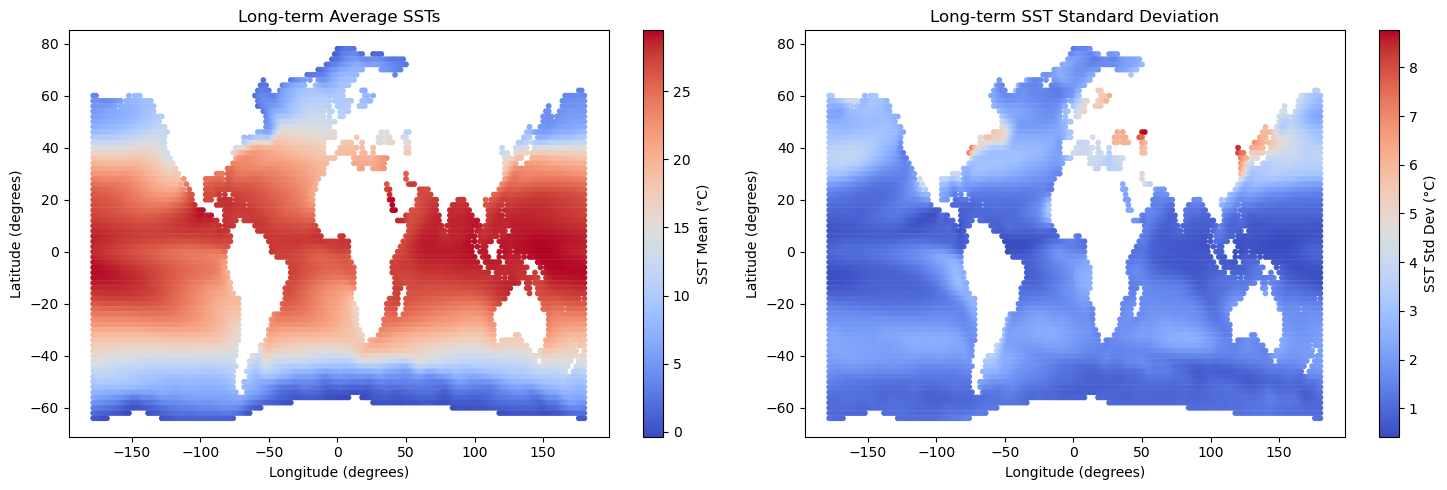

In [3]:
SST_mean = SST_df.mean()
SST_std = SST_df.std()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
scatter1 = plt.scatter(lat_lon['lon'], lat_lon['lat'], c=SST_mean, cmap='coolwarm',s=10)
plt.colorbar(scatter1, label='SST Mean (°C)')
plt.title('Long-term Average SSTs')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.subplot(1,2,2)
scatter2 = plt.scatter(lat_lon['lon'], lat_lon['lat'], c=SST_std, cmap='coolwarm',s=10)
plt.colorbar(scatter2, label='SST Std Dev (°C)')
plt.title('Long-term SST Standard Deviation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.tight_layout()
plt.show()

**SSTs are the warmest near the equator, specifically in the Indian Ocean and Western Pacific Ocean.**

**SSTs are the most variable generally along the coasts in the 35-60 degree latitude range, specifically in the Gulf Sttream along the NE US and East Asia Coasts.**

3. **(1 pt)** In this problem you will apply PCA to the SST data in SST_df and examine the results. First, fit a PCA model to your data and extract the explained variance for different PCs.

    **Create a barplot of the explained variance for the first 10 PCs, being sure to label all axes. How much variance is explained by the first PC?**

    **Next, extract the loadings associated with the first EOF and create a map showing these loadings across the global oceans.** 
    - You can use a similar approach as in problem #2 to create this map, with colors used to represent the loading values. 
    - However, here I have provided starter code to specify a custom color mapping (blue-to-red) that will improve map readability.
    - You will also want to specify the minimum and maximum values for the color scale using vmin and vmax (see starter code)

    **Finally, plot the time series of the first PC, being sure to label all axes.**

    **Based on the results from these three figures, briefly explain/interpret what the first PC represents in the SST dataset, and justify your answer.** 

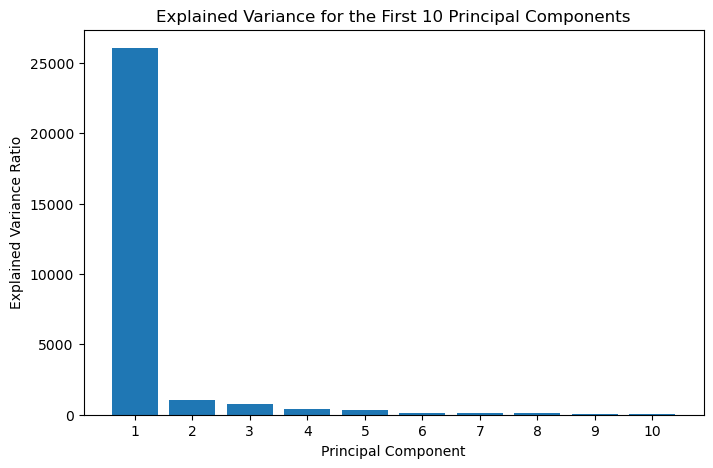

Almost all of the variance is explained by the first PC


In [4]:
pca = PCA()
pca.fit(SST_df)
explained_variance = pca.explained_variance_

plt.figure(figsize=(8,5))
plt.bar(range(1,11), explained_variance[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for the First 10 Principal Components')
plt.xticks(range(1, 11))
plt.show()

print('Almost all of the variance is explained by the first PC')

Text(0, 0.5, 'Latitude (degrees)')

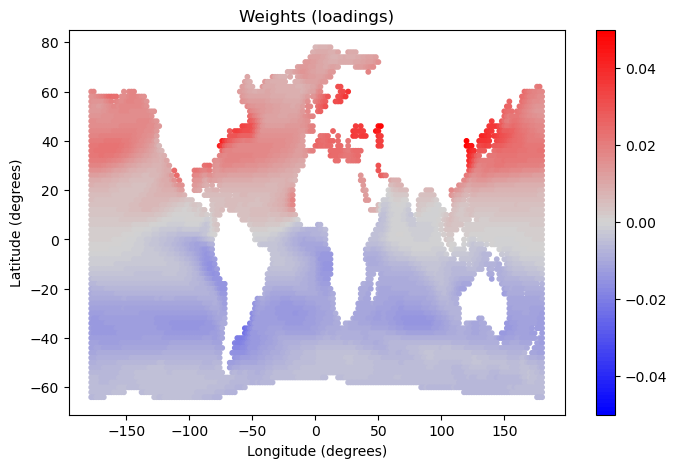

In [5]:
# EOF = Empirical Orthogonal Function
import matplotlib.colors as mcolors

W = np.transpose(pca.components_)[:,0] # W = loadings
plt.figure(figsize=(8,5))

# Define the custom colormap
colors = ['blue', 'lightgrey', 'red']  # Color transitions
n_bins = 100  # Number of bins for the colormap
cmap_name = 'custom_blue_white_red'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
plt.scatter(lat_lon['lon'], lat_lon['lat'], c=W,cmap=custom_cmap,s=10, vmin=-0.05,vmax=0.05)
plt.colorbar()
plt.title('Weights (loadings)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

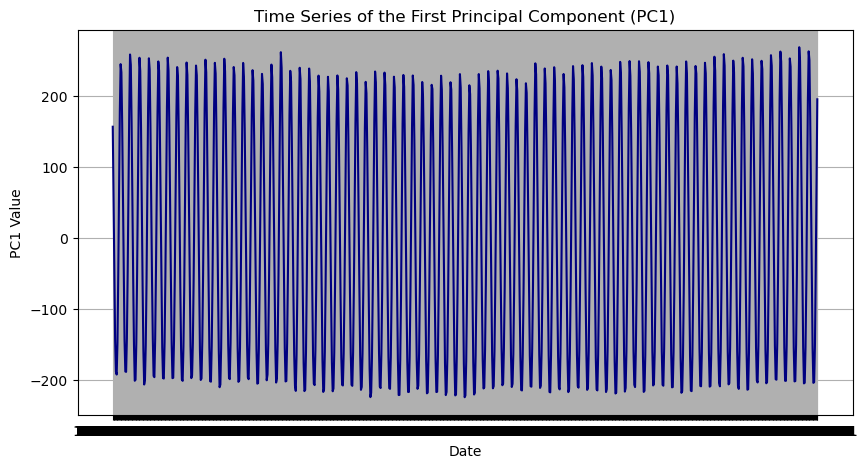

In [6]:
# Transform data to get PC1 time series
pc1_time_series = pca.transform(SST_df)[:, 0]

# Plot the time series of PC1
plt.figure(figsize=(10, 5))
plt.plot(SST_df_date, pc1_time_series, color='navy')
plt.title('Time Series of the First Principal Component (PC1)')
plt.xlabel('Date')
plt.ylabel('PC1 Value')
plt.grid()
plt.show()

**The first PC represents seasonality- it is the variable/ column with the most influence on the temperature change with time.**
The first PC is seasonality because the map shows the Northern Hemisphere as red (warm) and the Southern Hemisphere as blue (cool). Also, the time series shows great fluctuation but also to about the same max and min values- meaning the fluctuations happen every year, indicating seasonality.

4. **(1 pt)** We will now focus on SST anomalies (differences from long-term average conditions) during a specific season (late fall - early winter). 

    First, create a new version of SST_df (called sst_df_centered) in which the data for each grid cell are centered around the long-term average for each calendar month. That is, for a given grid cell and calendar month, find the long-term average SST for that grid cell and month (12 values, one for Jan, one for Feb, etc.). Then, subtract these long-term monthly mean values from the monthly SSTs for that grid cell (i.e., subtract the long-term mean January value from all January SSTs; do the same for all months). Repeat this process for all grid cells. The result will be a matrix of monthly SST anomalies (i.e., deviations from long-term monthly averages). 

    Next, for each calendar year (from 1949 through 2023), calculate the 3-month rolling average of monthly anomalies for October, November, and December (OND) of that year. There should be a single OND anomaly value for each year for each grid cell. Place these annual OND anomaly values in a dataframe called sst_df_centered_OND.  
    
    **Plot the time series of OND anomaly values against years for the grid cell at longitude = -100 and latitude = 0 (a location in the middle of the equatorial Pacific Ocean).**

In [13]:
SST_df_date = pd.to_datetime(SST_df_['date'])
# Create a DataFrame for dates with month and year
SST_df_date = pd.DataFrame({'date': SST_df_date})
SST_df_date['month'] = SST_df_date['date'].dt.month
SST_df_date['year'] = SST_df_date['date'].dt.year

# Center each grid cell by subtracting long-term monthly means
sst_df_centered = SST_df.copy()  # Initialize a copy for centering

for month in range(1, 13):
    # Identify rows corresponding to the current month
    month_mask = SST_df_date['month'] == month
    
    # Calculate the long-term mean for each grid cell for this month
    month_means = SST_df.loc[month_mask].mean(axis=0)

    # Subtract the monthly mean from the respective rows
    sst_df_centered.loc[month_mask] -= month_means

# Calculate OND anomalies for each year
OND_anomalies = []

for year in range(1949, 2024):  # Adjust the year range based on your dataset
    # Identify rows for October, November, and December of the current year
    ond_mask = (SST_df_date['year'] == year) & (SST_df_date['month'].isin([10, 11, 12]))
    
    # Ensure there are exactly 3 months of data for OND
    if ond_mask.sum() == 3:
        # Calculate the OND mean anomaly for each grid cell
        OND_mean = sst_df_centered.loc[ond_mask].mean(axis=0)
        OND_anomalies.append(OND_mean)

# Convert OND anomalies into a DataFrame
sst_df_centered_OND = pd.DataFrame(OND_anomalies, index=range(1949, 2024))

In [14]:

# Reset column names to match the order in lat_lon
sst_df_centered_OND.columns = lat_lon.index.astype(str)
# Find the grid cell index in lat_lon
target_col = lat_lon[(lat_lon['lon'] == -100) & (lat_lon['lat'] == 0)].index[0]
# Convert target_col to a string since sst_df_centered_OND columns are strings
target_col = str(target_col)
# Extract the OND anomaly time series for the grid cell
time_series = sst_df_centered_OND[target_col]


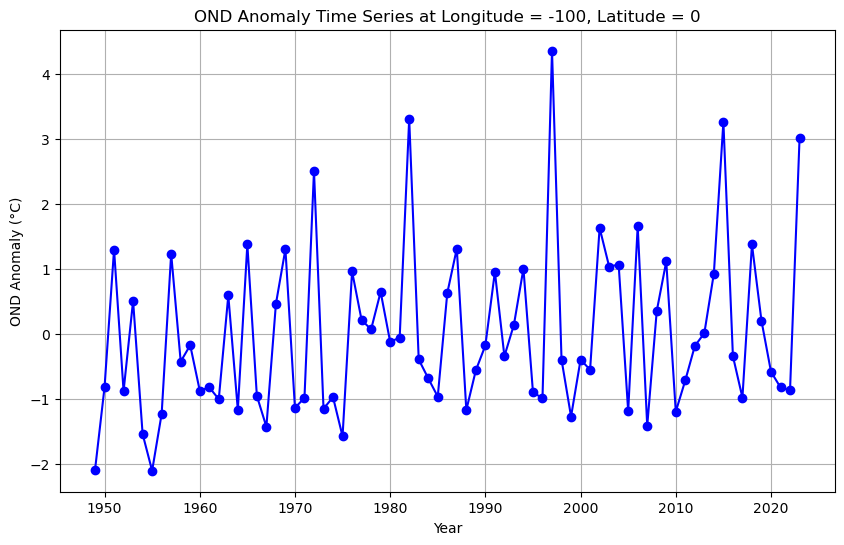

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1949, 2024), time_series, marker='o', linestyle='-', color='b')
plt.title('OND Anomaly Time Series at Longitude = -100, Latitude = 0')
plt.xlabel('Year')
plt.ylabel('OND Anomaly (°C)')
plt.grid()
plt.show()

5. **(1 pt) Apply PCA to the data in SST_df_centered_OND and create a barplot of the explained variance for the first 10 PCs, being sure to label all axes. How many PCs do you think are worth further examination based on this result? Justify your choice.**

    **For the number of PCs you selected, extract the loadings of the associated EOFs and create a map showing these loadings across the global oceans.** 
    - Follow a similiar approach as in problem #3 to create these maps. 

    **Briefly describe the most prominant spatial pattern observed in each of the EOFs selected.**

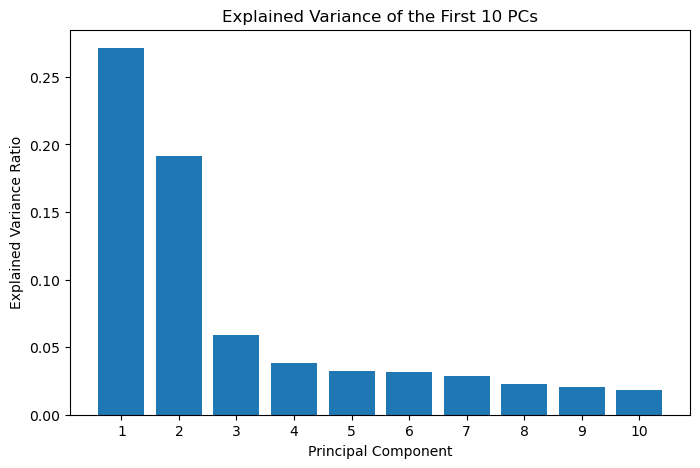

A lot of the the variance is explained by the first and second PCs, overall they are less skewed than in problem 3


In [16]:
# Convert data to a NumPy array for PCA
pca = PCA(n_components=10)  # Extract first 10 PCs
pca_result = pca.fit(sst_df_centered_OND)

# Explained variance for each PC
explained_variance = pca_result.explained_variance_ratio_  # what does the ratio_ add?

plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), explained_variance[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of the First 10 PCs')
plt.xticks(range(1, 11))
plt.show()

print('A lot of the the variance is explained by the first and second PCs, overall they are less skewed than in problem 3')

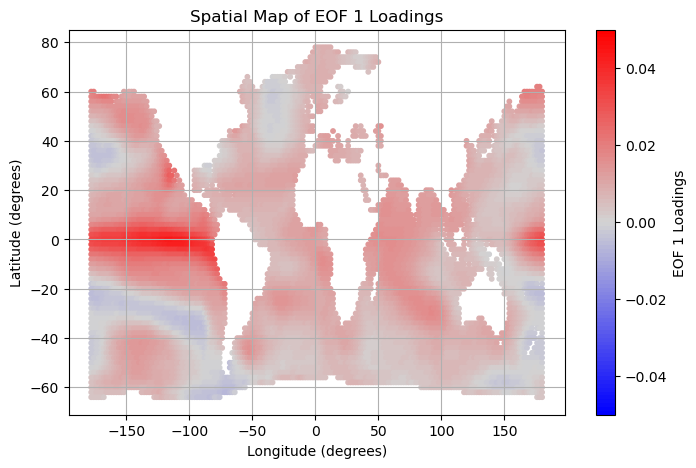

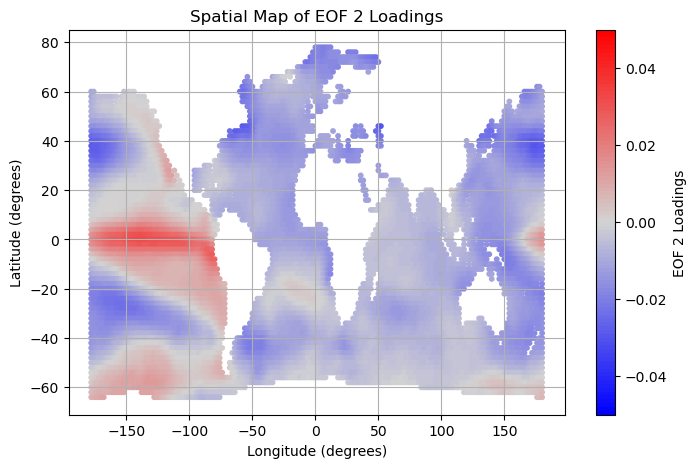

In [17]:
# Extract the loading values (EOFs) for the selected PCs
selected_pcs = [0, 1]  
W = np.transpose(pca.components_)[:, selected_pcs]

# Define the custom colormap
colors = ['blue', 'lightgrey', 'red']  # Color transitions
n_bins = 100  # Number of bins for the colormap
cmap_name = 'custom_blue_white_red'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Loop through selected PCs and create spatial maps
selected_pcs = [0, 1] 
for i, pc in enumerate(selected_pcs):
    plt.figure(figsize=(8, 5))
    plt.scatter(lat_lon['lon'], lat_lon['lat'], c=W[:, i], cmap=custom_cmap, s=10, vmin=-0.05, vmax=0.05)
    plt.colorbar(label=f'EOF {pc+1} Loadings')
    plt.title(f'Spatial Map of EOF {pc+1} Loadings')
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')
    plt.grid()
    plt.show()

**In both of the EOF loadings, ENSO is prominant. In EOF 1, the most prominant spatial pattern is definetly the warm water in the Pacific Ocean near the Equator, signifying that the ENSO pattern is prominant.** More warm water near South America Coast = La Nina 

**For the second EOF: There is more strong red and blue coloring on the map. The eastern Canadian coast is dark blue signifying the variabilty of the NOA (North Atlantic Oscillation) and the the Pacific still shows ENSO, but the red isn't as strong as in EOF 1. There is also now some stong blue under the red in the pacific.**

6. **(1 pt) In the first 2 panels of a 3-panel figure, plot the time series of the selected PCs from problem #5 derived from the SST_df_centered_OND dataset. Be sure to label all axes.** 

    **Then, in the third panel, plot the time series of OND anomaly values against years for the grid cell at longitude = -100 and latitude = 0 (as you did in problem #4).**
    
    **Finally, use the synthesis equation to estimate the OND anomaly values for this grid cell based on the PCs you selected from problem #5. Add these estimated values as another line in the third panel. Briefly comment on how well you were able to reconstruct the OND anomaly values at this grid cell with the PCs you selected.** 

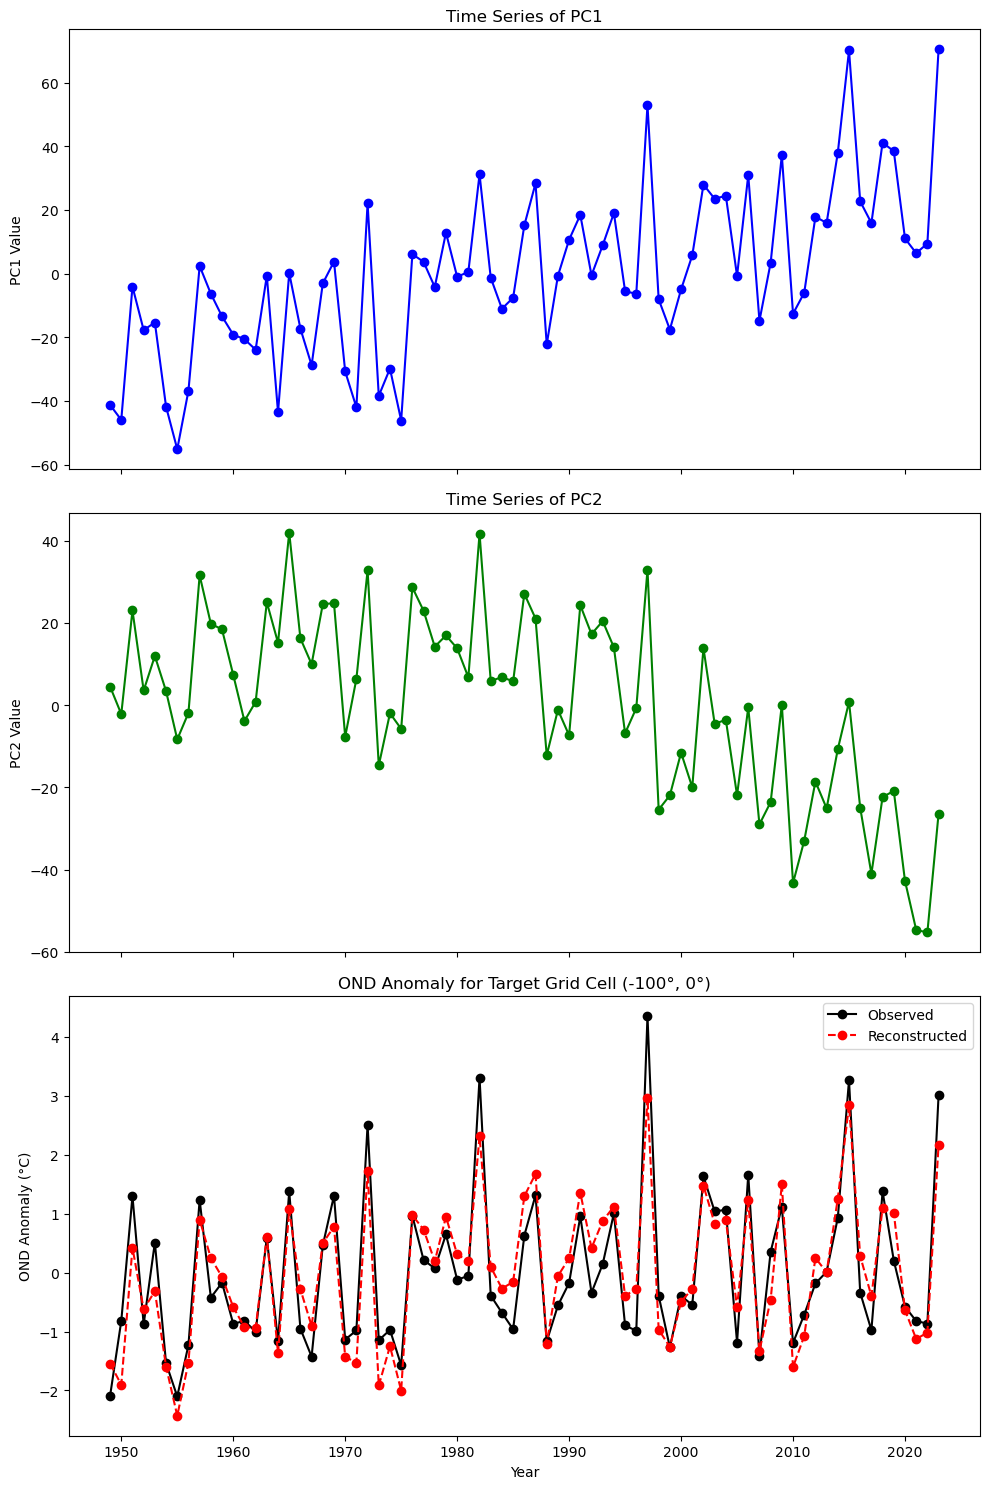

In [20]:
# Assume PC time series are stored in pca_result.transform(sst_df_centered_OND)
pc_time_series = pca_result.transform(sst_df_centered_OND)  # Shape: (n_samples, n_components)
selected_pcs = [0, 1]  # PCs to plot

# Create a 3-panel figure
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot time series of the first selected PC
axes[0].plot(range(1949, 2024), pc_time_series[:, selected_pcs[0]], marker='o', linestyle='-', color='b')
axes[0].set_title('Time Series of PC1')
axes[0].set_ylabel('PC1 Value')

# Plot time series of the second selected PC
axes[1].plot(range(1949, 2024), pc_time_series[:, selected_pcs[1]], marker='o', linestyle='-', color='g')
axes[1].set_title('Time Series of PC2')
axes[1].set_ylabel('PC2 Value')

# Add the OND anomaly time series to the third panel
axes[2].plot(range(1949, 2024), observed_anomalies, marker='o', linestyle='-', color='k', label='Observed')
# Plot the reconstructed anomalies
axes[2].plot(range(1949, 2024), reconstructed_anomalies, marker='o', linestyle='--', color='r', label='Reconstructed')

# Add title, labels, and legend to the third panel
axes[2].set_title('OND Anomaly for Target Grid Cell (-100°, 0°)')
axes[2].set_ylabel('OND Anomaly (°C)')
axes[2].set_xlabel('Year')
axes[2].legend()

# Adjust layout for readability
plt.tight_layout()


In [19]:
# Need to re-run the cell above after this one to graph the red-dashed line!
# Extract the OND anomaly time series for the grid cell
target_col = lat_lon[(lat_lon['lon'] == -100) & (lat_lon['lat'] == 0)].index[0]
target_col = str(target_col)  # Ensure column is a string
observed_anomalies = sst_df_centered_OND[target_col]

# Extract the loadings for all selected PCs
W = np.transpose(pca.components_)[:, selected_pcs]

# Ensure target_col is an integer
target_index = int(target_col)

# Extract loadings for the selected PCs at the target grid cell
loadings_for_target = W[target_index, :]  # Extract a vector of loadings

# Compute the reconstructed anomalies
reconstructed_anomalies = pc_time_series[:, selected_pcs] @ loadings_for_target


**The reconstructed anomalies are generally close to the observed values. The reconstructed anomalies were a little more mild than the observed ones.**

7. **(1 pt)** In this problem you will use the selected PCs from problem #5 to build a forecasting model that predicts air temperatures over land around the world. 

    First, download the air_temp_df.csv file from Canvas under Assignment 6 and load in this data as a Pandas dataframe called 'air_temp_df'. These data come from NOAA's Global Surface Temperature dataset and contain:
    - The date of monthly air temperature observations over land from 1950-01-01 through 2024-07-01 (first column)
    - A time series of surface air temperatures (in degrees C) for 5-degree latitude by 5-degree longitude grid cells over the world's land masses (remaining columns)

    Note: As before, I would recommend saving the date in air_temp_df into a separate variable and then removing the first column of air_temp_df so that it only contains the air temperature values. 

    Also download the latitude_longitude_air_temp.csv file and load in this data as a Pandas dataframe called 'lat_lon_air_temp'. This file contains the latitude and longitude (in decimal degrees) for every grid cell in air_temp_df. Note that the order of longitude and latitude values in lat_lon_air_temp is aligned with the order of grid cells along the columns of air_temp_df. 

    Once you have downloaded and loaded in these data, create a matrix of annual air temperature anomalies for January, February, and March (JFM), called air_temp_df_centered_JFM, in the same way you made the annual SST anomaly matrix (sst_df_centered_OND) for SSTs between October-December. Note that the JFM air temperature values occur in the season following the OND SST anomaly values, allowing us to assess whether the OND SST anomaly values can be used to forecast global air temperatures in the following three-month period. 

    For each grid cell in air_temp_df_centered_JFM, regress the temperature anomaly values again the PCs of sst_df_centered_OND you selected in problem #5. Save the R-squared value for each air temperature grid cell. 
    
    **Finally, create a map of these R-squared values across the world's land masses. In which continents are JFM air temperature anomalies most predictable based on SST anomalies from the preceding OND season?**

In [21]:
air_temp_df_ = pd.read_csv("air_temp_df.csv")
air_temp_df_date = air_temp_df_['date']
air_temp_df = air_temp_df_.drop('date', axis=1)
lat_lon_air_temp = pd.read_csv("latitude_longitude_air_temp.csv")

In [22]:
# Extract the year and month from the dates
air_temp_dates = pd.to_datetime(air_temp_df_date)
air_temp_df['month'] = air_temp_dates.dt.month
air_temp_df['year'] = air_temp_dates.dt.year

# Center air temperature anomalies by subtracting the long-term monthly mean
air_temp_df_centered = air_temp_df.copy()
for month in range(1, 13):
    month_mask = air_temp_df['month'] == month
    long_term_mean = air_temp_df.loc[month_mask].iloc[:, :-2].mean(axis=0)
    air_temp_df_centered.loc[month_mask, air_temp_df.columns[:-2]] -= long_term_mean

# Create the JFM anomaly matrix
air_temp_df_centered_JFM = []
for year in range(1950, 2024):  # Adjust based on data range
    jfm_mask = (air_temp_df['year'] == year) & (air_temp_df['month'].isin([1, 2, 3]))
    if jfm_mask.sum() == 3:  # Ensure all three months are present
        jfm_mean = air_temp_df_centered.loc[jfm_mask].iloc[:, :-2].mean(axis=0)
        air_temp_df_centered_JFM.append(jfm_mean)

# Convert to DataFrame
air_temp_df_centered_JFM = pd.DataFrame(air_temp_df_centered_JFM, index=range(1950, 2024))


In [23]:
# Define the common years (1950 to 2023)
common_years = range(1950, 2024)
# Subset the PC time series to exclude 2024
X_aligned = pc_time_series[:len(common_years), selected_pcs]

# Subset the air temperature anomalies to the same years
air_temp_df_aligned = air_temp_df_centered_JFM.loc[common_years]


In [24]:
from sklearn.linear_model import LinearRegression

# Prepare storage for R-squared values
r2_values = []

# Loop through each grid cell in the aligned air temperature dataset
for col in air_temp_df_aligned.columns:
    y = air_temp_df_aligned[col].values  # Target variable for this grid cell
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_aligned, y)
    
    # Compute R-squared and store
    r2 = model.score(X_aligned, y)
    r2_values.append(r2)

# Convert R-squared values to a DataFrame
r2_df = pd.DataFrame({'r2': r2_values}, index=lat_lon_air_temp.index)


In [25]:
# Check the years in air_temp_df_centered_JFM
print("Air Temperature Years:", air_temp_df_centered_JFM.index)

# Check the years in pc_time_series
print("PC Time Series Years:", range(1950, 2025))  # Assuming 1950 to 2024


Air Temperature Years: RangeIndex(start=1950, stop=2024, step=1)
PC Time Series Years: range(1950, 2025)


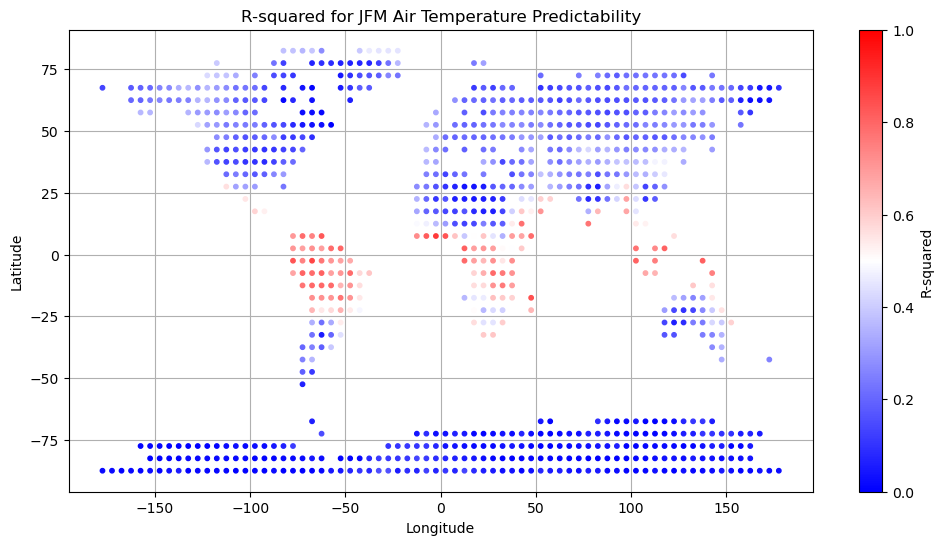

In [26]:
# Define a colormap for R-squared values
cmap = mcolors.LinearSegmentedColormap.from_list("r2_colormap", ["blue", "white", "red"])

# Create the map
plt.figure(figsize=(12, 6))
plt.scatter(lat_lon_air_temp['lon'], lat_lon_air_temp['lat'], c=r2_df['r2'], cmap=cmap, s=10, vmin=0, vmax=1)
plt.colorbar(label="R-squared")
plt.title("R-squared for JFM Air Temperature Predictability")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

**The tropics are the most predictable because their temperature patterns depend on seaonal variabilty like ocean temperatures.**
The continents where air temperature anomalies are most predictable based on SST anomalies from the preceding OND season are South America, Africa, and the Philippines (Asia).

8. **(1 pt)** In the following questions, we are going to shift gears and revisit the ebird dataset from Assignment 4. Follow the instructions from Assignment 4 to re-create the dataframe called 'ebird_habitat'. This will include steps 1-2 in Assignment 4. Please also review the description of these data from the previous assignment.

    Create a numpy array X composed of the following landscape features in the ebird_habitat dataframe:
    - pland_forest
    - pland_grassland_shrubland_savanna
    - pland_wetland
    - pland_cropland
    - pland_urban
    - pland_other
    - elevation_median
    - elevation_sd

    For K=1 through 20, use K-means clustering to cluster these data in K clusters, and save the inertia (i.e., within-group sum of squares) for each clustering. Remember to consider important preprocessing steps before clustering.   

    **Plot the inertia against each value of K. How many clusters do you think are appropriate for this dataset? Justify your choice.**


In [ ]:
ebird = pd.read_csv('ebd_woothr_june_bcr27_zf.csv')
habitat = pd.read_csv('pland_elev_location_year.csv')
ebird_habitat = pd.merge(ebird, habitat, how='inner').dropna()
ebird_habitat['species_observed'] = ebird_habitat['species_observed'].astype(int)

In [29]:
from sklearn.preprocessing import StandardScaler

# Specify features to include in clustering
features = [
    "pland_forest",
    "pland_grassland_shrubland_savanna",
    "pland_wetland",
    "pland_cropland",
    "pland_urban",
    "pland_other",
    "elevation_median",
    "elevation_sd"
]

# Extract the features into a NumPy array
X = ebird_habitat[features].values

# Standardize the features for fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


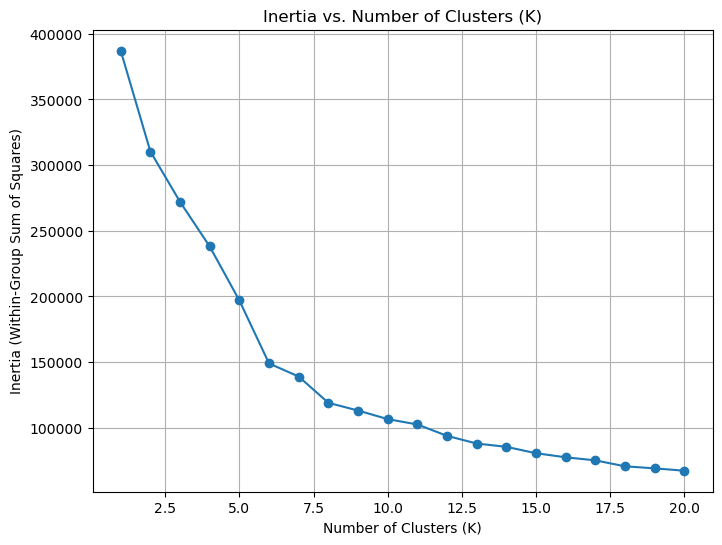

In [30]:
# Initialize an empty list to store inertia values
inertia = []

# Loop through values of K from 1 to 20
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia against K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia, marker='o', linestyle='-')
plt.title("Inertia vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Group Sum of Squares)")
plt.grid()
plt.show()


**There should be 8 clusters for this dataset because that's where the elbow is on the graph. The curve flattens out after 8.**

9. **(1 pt)** For the number of clusters you selected in problem #8, fit a final K-means clustering model to your data.

    **Create a map plotting the locations in the ebird_habitat dataset, and color the sampling locations based on the clusters in which they fall.**

    Create a dataframe with one column containing the cluster labels for each observation from the K-means algorithm, and another column with the presence/absence of thrush (species_observed). 

    **Using pd.crosstab, create and print a cross tabulation of the number of observations in each of the K-means clusters, and whether those observations did or did not contain thrush.**
    - use the 'margins=True' argument in pd.crosstab to also report the total number of observations in each category. 

    **For each of the K-means clusters, calculate and report the proportion of observations that contained thrush.**

    **For the K-means clusters with the highest and lowest proportion of observations with thrush, calculate and report the average values for each of the features used in the clustering (i.e., the average pland_forest, pland_wetland, elevation_median, etc.).**

    **Briefly comment on two large distinguishing factors that separate the clusters with the highest and lowest proportion of observations with thrush.**


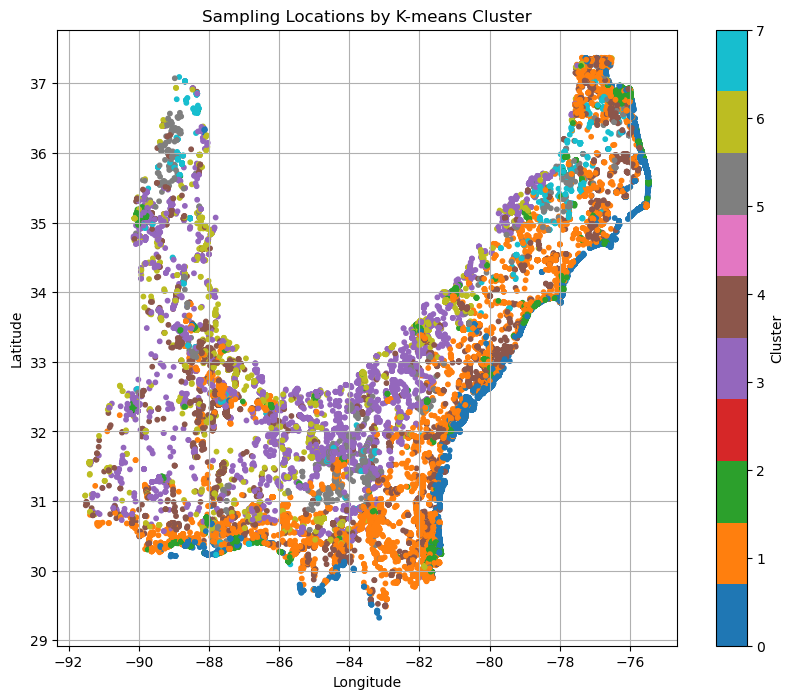

In [31]:
# Fit the final K-means model with 8 clusters
kmeans_final = KMeans(n_clusters=8, random_state=42)
kmeans_final.fit(X_scaled)  # Use the scaled array

# Get cluster labels for each observation
cluster_labels = kmeans_final.labels_


# Assume ebird_habitat contains 'latitude' and 'longitude' columns
plt.figure(figsize=(10, 8))
plt.scatter(ebird_habitat['longitude'], ebird_habitat['latitude'], c=cluster_labels, cmap='tab10', s=10)
plt.colorbar(label="Cluster")
plt.title("Sampling Locations by K-means Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [33]:
# Create a DataFrame with cluster labels and species_observed
cluster_df = pd.DataFrame({
    'cluster': cluster_labels,
    'species_observed': ebird_habitat['species_observed']  # Presence/absence of thrush
})

# Create a cross tabulation
crosstab = pd.crosstab(cluster_df['cluster'], cluster_df['species_observed'], margins=True)
print(crosstab)

# Calculate proportions of observations containing thrush
proportions = crosstab[1] / crosstab['All']  # Assuming 1 indicates thrush presence
print(proportions)

# Identify clusters with highest and lowest proportion of thrush
highest_cluster = proportions.idxmax()
lowest_cluster = proportions.idxmin()

print(f"Cluster with highest proportion of thrush: {highest_cluster}")
print(f"Cluster with lowest proportion of thrush: {lowest_cluster}")

# Filter data for the highest and lowest clusters
highest_cluster_data = ebird_habitat[cluster_labels == highest_cluster]
lowest_cluster_data = ebird_habitat[cluster_labels == lowest_cluster]

# Calculate average feature values for each cluster
highest_avg_features = highest_cluster_data[features].mean()
lowest_avg_features = lowest_cluster_data[features].mean()

print("Average feature values for cluster with highest proportion of thrush:")
print(highest_avg_features)

print("\nAverage feature values for cluster with lowest proportion of thrush:")
print(lowest_avg_features)



species_observed      0     1    All
cluster                             
0                  8351    30   8381
1                 12602   400  13002
2                  6338   110   6448
3                  6658   576   7234
4                  5609   658   6267
5                  1664    39   1703
6                  4131   238   4369
7                   955    32    987
All               46308  2083  48391
cluster
0      0.003580
1      0.030764
2      0.017060
3      0.079624
4      0.104994
5      0.022901
6      0.054475
7      0.032421
All    0.043045
dtype: float64
Cluster with highest proportion of thrush: 4
Cluster with lowest proportion of thrush: 0
Average feature values for cluster with highest proportion of thrush:
pland_forest                          0.677877
pland_grassland_shrubland_savanna     0.288923
pland_wetland                         0.008164
pland_cropland                        0.001824
pland_urban                           0.004655
pland_other                     

**In the highest proportion of thrush (4), there is one feature value that is 40 and the rest are basically 0 (one is 4), but the lowest proportion of thrush (0), there are mainly almost 0 values and a 2 and a 3.** Cluster 4 has an outlier!

10. **(1 pt)** In this problem and the next, we will apply hierarchical clustering to the same (pre-processed) landscape features as used in problems #8 and #9 from the ebird_habitat dataset. 

    Before developing and examining the results of a hierarchical clustering of the data, we will explore the efficiency of the algorithm as it relates to sample size. 
    
    Create a list of values representing the proportion of the full dataset on which to perform the hierarchical clustering: *proportions*=[.001,.01,.1,.25,.5,.6].

    Loop through these values, and for each iteration of the loop, use train_test_split from sklearn.model_selection to split the landscape features into two subsets (called X_1 and X_2, similar to X_train and X_test in our previous applications of train_test_split). 
    - Here, X_2 should contain a fraction of the full set of observations, with the fraction equal to the value of *proportions* in the current iteration. 
    - Be sure to stratify the samples in train_test_split based on the values of *species_observed*.

    **For each iteration in the loop, calculate the wall-clock time it takes to apply hierarchical clustering to the data in X_2 (using an average linkage method). Plot the wall-clock time against the proportion of the data used in each round of clustering.** You can calculate the wall-clock time by:
    - importing the *time* library
    - saving the start time (start_time = time.time()) and end time (end_time = time.time()) before and after the line of code used to conduct the clustering 
    - calculating the difference between the end time and start time for each iteration (end_time - start_time).
    
    **What do your results imply about the efficiency of the hierarchical clustering algorithm on large datasets?**



11. **(1 pt)** Following a similar approach to problem #10, subset the lanscape data using 0.2% of the original data size. This will lead to a small dataset of ~100 observations that will be easy to visualize with hierarchical clustering. Be sure to stratify the subsets based on the presence/absense of thrush.

    **Fit two hierarchical clustering models, one using single-linkage and the other using complete-linkage. Plot dendograms for both, and comment on 1 major difference that you see between the two linkage approaches.** 
    
    Subset the original lanscape data again, but this time using 50% of the original data (and again, with stratification). Fit a hierarchical clustering model to these data using an average-linkage. Using the same number of clusters as you selected in problem #8, cluster the observations into groups using the fcluster function with the argument criterion='maxclust'.

    **Similar to problem #9, use pd.crosstab to create and print a cross tabulation of the number of observations in each of the hierarchical clusters, and whether those observations did or did not contain thrush.**

    **Create and print a similar cross tabulation using the same number of clusters, but this time using K-means clustering fit to the same 50% of data used by the hierarchical clustering algorithm.**

    **Briefly comment on the largest difference you see in the number of observations within the clusters identified by K-means and hierarchical clustering.**


I used ChatGPT (OpenAI, 2024) in problems 3-9